# Comprensión y Análisis Exploratorio de Datos (EDA)

**Proyecto:** Pipeline MLOps - Predicción de Pago a Tiempo de Créditos

**Autor:** Alexis Jacquet

**Fecha:** 5 de febrero de 2026

---

## Objetivo

Realizar un análisis exploratorio exhaustivo de los datos para:
1. Comprender la estructura y características de los datos
2. Identificar patrones, tendencias y anomalías
3. Detectar problemas de calidad de datos
4. Establecer reglas de validación
5. Identificar transformaciones necesarias para el modelado

## Contenido

1. Carga de Datos y Configuración
2. Exploración Inicial de Datos
3. Análisis Univariable
4. Análisis Bivariable
5. Análisis Multivariable
6. Reglas de Validación
7. Transformaciones Identificadas
8. Conclusiones y Recomendaciones

## 1. Carga de Datos y Configuración

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

np.random.seed(42)

print("✓ Librerías cargadas y configuradas")

✓ Librerías cargadas y configuradas


In [ ]:
# Cargar datos
RUTA_RAIZ = Path.cwd().parent.parent
RUTA_DATOS = RUTA_RAIZ / 'data' / 'Base_de_datos.csv'

df = pd.read_csv(RUTA_DATOS)
print(f"✓ Datos cargados: {df.shape[0]:,} filas x {df.shape[1]} columnas")

# Crear una copia para trabajar sin modificar el original
df_original = df.copy()
print("✓ Copia de seguridad creada")

✓ Datos cargados: 10,763 filas x 23 columnas
✓ Copia de seguridad creada


## 2. Exploración Inicial de Datos

### 2.1 Descripción General

In [3]:
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]:,} registros x {df.shape[1]} variables")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*80)

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 10,763 registros x 23 variables
Memoria utilizada: 3.47 MB



In [4]:
# Vista previa de los datos
print("Primeras 10 filas del dataset:")
df.head(10)

Primeras 10 filas del dataset:


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.000,10,42,Independiente,8000000,2500000,341296,88.768,695.000,10,5,0.000,51258.000,51258.000,0.000,5,0,0,908526.000,Estable,1
1,4,2025-04-22 09:47:35,840000.000,6,60,Empleado,3000000,2000000,124876,95.228,789.000,3,1,0.000,8673.000,8673.000,0.000,0,0,2,939017.000,Creciente,1
2,9,2026-01-08 12:22:40,5974028.400,10,36,Independiente,4036000,829000,529554,47.614,740.000,4,5,0.000,18702.000,18702.000,0.000,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.000,6,48,Empleado,1524547,498000,252420,95.228,837.000,4,4,0.000,15782.000,15782.000,0.000,3,0,0,1536193.000,Creciente,1
4,9,2025-04-26 11:24:26,2781636.000,11,44,Empleado,5000000,4000000,217037,95.228,771.000,4,6,0.000,204804.000,204804.000,0.000,3,0,1,933473.000,Creciente,1
5,4,2025-06-10 08:54:01,1031928.000,12,32,Empleado,2800000,800000,82872,95.228,721.000,10,13,0.000,24399.000,24399.000,0.000,2,0,8,2808474.000,Creciente,1
6,4,2025-08-09 13:00:44,3064280.400,6,68,Independiente,1000000,22005000,461231,95.228,814.000,11,8,0.000,211775.000,211775.000,0.000,6,3,0,969508.000,Creciente,1
7,4,2025-08-18 12:49:19,3619560.000,6,31,Empleado,3782303,305000,542079,95.228,760.000,1,5,0.000,12078.000,12078.000,0.000,0,1,0,3782303.000,Creciente,1
8,9,2025-05-30 09:11:18,2134827.600,10,31,Empleado,14500000,8000000,181732,95.228,737.000,0,2,0.000,0.000,NaN,NaN,0,0,0,14007850.000,Creciente,1
9,4,2024-12-31 14:32:59,8400000.000,6,45,Empleado,14000000,5000000,1166667,95.228,752.000,4,3,0.000,125383.000,125383.000,0.000,2,0,0,28889623.000,Creciente,1


In [5]:
# Información detallada de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10763 non-null  int64  
 1   fecha_prestamo                 10763 non-null  object 
 2   capital_prestado               10763 non-null  float64
 3   plazo_meses                    10763 non-null  int64  
 4   edad_cliente                   10763 non-null  int64  
 5   tipo_laboral                   10763 non-null  object 
 6   salario_cliente                10763 non-null  int64  
 7   total_otros_prestamos          10763 non-null  int64  
 8   cuota_pactada                  10763 non-null  int64  
 9   puntaje                        10763 non-null  float64
 10  puntaje_datacredito            10757 non-null  float64
 11  cant_creditosvigentes          10763 non-null  int64  
 12  huella_consulta                10763 non-null 

### 2.2 Caracterización de Variables

Clasificaremos las variables según su tipo y naturaleza para un análisis más estructurado.

In [6]:
# Identificar tipos de variables
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
columnas_fecha = [col for col in df.columns if 'fecha' in col.lower()]

# Variable objetivo
variable_objetivo = 'Pago_atiempo'

# Eliminar variable objetivo y fechas de las listas
if variable_objetivo in columnas_numericas:
    columnas_numericas.remove(variable_objetivo)
for fecha in columnas_fecha:
    if fecha in columnas_numericas:
        columnas_numericas.remove(fecha)
    if fecha in columnas_categoricas:
        columnas_categoricas.remove(fecha)

print("="*80)
print("CARACTERIZACIÓN DE VARIABLES")
print("="*80)
print(f"\n📊 VARIABLE OBJETIVO:")
print(f"   {variable_objetivo}")
print(f"\n🔢 VARIABLES NUMÉRICAS ({len(columnas_numericas)}):")
for i, col in enumerate(columnas_numericas, 1):
    print(f"   {i:2d}. {col}")
print(f"\n📝 VARIABLES CATEGÓRICAS ({len(columnas_categoricas)}):")
for i, col in enumerate(columnas_categoricas, 1):
    print(f"   {i:2d}. {col}")
print(f"\n📅 VARIABLES DE FECHA ({len(columnas_fecha)}):")
for i, col in enumerate(columnas_fecha, 1):
    print(f"   {i:2d}. {col}")
print("\n" + "="*80)

CARACTERIZACIÓN DE VARIABLES

📊 VARIABLE OBJETIVO:
   Pago_atiempo

🔢 VARIABLES NUMÉRICAS (19):
    1. tipo_credito
    2. capital_prestado
    3. plazo_meses
    4. edad_cliente
    5. salario_cliente
    6. total_otros_prestamos
    7. cuota_pactada
    8. puntaje
    9. puntaje_datacredito
   10. cant_creditosvigentes
   11. huella_consulta
   12. saldo_mora
   13. saldo_total
   14. saldo_principal
   15. saldo_mora_codeudor
   16. creditos_sectorFinanciero
   17. creditos_sectorCooperativo
   18. creditos_sectorReal
   19. promedio_ingresos_datacredito

📝 VARIABLES CATEGÓRICAS (2):
    1. tipo_laboral
    2. tendencia_ingresos

📅 VARIABLES DE FECHA (1):
    1. fecha_prestamo



### 2.3 Análisis de Valores Nulos

Identificaremos y cuantificaremos los valores nulos en cada columna.

ANÁLISIS DE VALORES NULOS

Total de valores nulos en el dataset: 7,175
Porcentaje total de nulos: 2.90%


Columnas con valores nulos: 7

                      Columna Tipo_Dato  Valores_Nulos  Porcentaje_Nulos  Valores_Unicos
           tendencia_ingresos    object           2932            27.241              46
promedio_ingresos_datacredito   float64           2930            27.223            5309
          saldo_mora_codeudor   float64            590             5.482               4
              saldo_principal   float64            405             3.763            8647
                   saldo_mora   float64            156             1.449              55
                  saldo_total   float64            156             1.449            8858
          puntaje_datacredito   float64              6             0.056             315


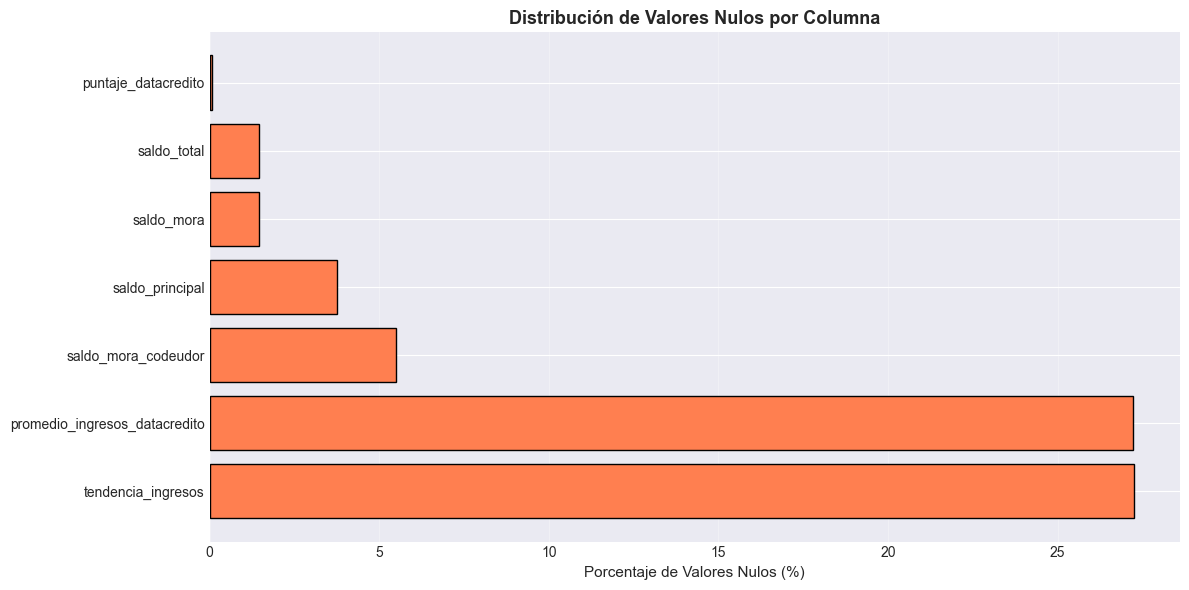

In [7]:
# Análisis detallado de valores nulos
def analizar_nulos(dataframe):
    """
    Analiza valores nulos en el dataframe
    """
    nulos_count = dataframe.isnull().sum()
    nulos_pct = (nulos_count / len(dataframe)) * 100
    
    resumen = pd.DataFrame({
        'Columna': dataframe.columns,
        'Tipo_Dato': dataframe.dtypes,
        'Valores_Nulos': nulos_count.values,
        'Porcentaje_Nulos': nulos_pct.values,
        'Valores_Unicos': [dataframe[col].nunique() for col in dataframe.columns]
    })
    
    resumen = resumen.sort_values('Valores_Nulos', ascending=False)
    return resumen

resumen_nulos = analizar_nulos(df)

print("="*80)
print("ANÁLISIS DE VALORES NULOS")
print("="*80)
print(f"\nTotal de valores nulos en el dataset: {df.isnull().sum().sum():,}")
print(f"Porcentaje total de nulos: {(df.isnull().sum().sum() / df.size * 100):.2f}%\n")

# Mostrar solo columnas con nulos
resumen_con_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]

if len(resumen_con_nulos) > 0:
    print(f"\nColumnas con valores nulos: {len(resumen_con_nulos)}\n")
    print(resumen_con_nulos.to_string(index=False))
    
    # Visualización
    if len(resumen_con_nulos) > 0:
        plt.figure(figsize=(12, 6))
        plt.barh(resumen_con_nulos['Columna'], resumen_con_nulos['Porcentaje_Nulos'], 
                color='coral', edgecolor='black')
        plt.xlabel('Porcentaje de Valores Nulos (%)', fontsize=11)
        plt.title('Distribución de Valores Nulos por Columna', fontsize=13, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("\n✓ No se encontraron valores nulos en ninguna columna")

### 2.4 Unificar Representación de Valores Nulos

Convertiremos diferentes representaciones de nulos a un formato estándar.

In [8]:
# Valores que deben considerarse como nulos
valores_nulos = ['', ' ', 'NA', 'N/A', 'na', 'n/a', 'NULL', 'null', 'None', 'none', '-', '--', '?']

print("Unificando representaciones de valores nulos...")
print(f"\nValores tratados como nulos: {valores_nulos}")

# Reemplazar valores nulos en columnas categóricas
for col in columnas_categoricas:
    df[col] = df[col].replace(valores_nulos, np.nan)

# Verificar cambios
nulos_despues = df.isnull().sum().sum()
print(f"\nTotal de nulos después de unificar: {nulos_despues:,}")
print("✓ Valores nulos unificados")

Unificando representaciones de valores nulos...

Valores tratados como nulos: ['', ' ', 'NA', 'N/A', 'na', 'n/a', 'NULL', 'null', 'None', 'none', '-', '--', '?']

Total de nulos después de unificar: 7,175
✓ Valores nulos unificados


### 2.5 Conversión de Tipos de Datos

Aseguraremos que cada columna tenga el tipo de dato correcto.

In [9]:
print("="*80)
print("CONVERSIÓN DE TIPOS DE DATOS")
print("="*80)

# Convertir columnas de fecha
for col in columnas_fecha:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"✓ {col} convertida a datetime")
        except Exception as e:
            print(f"❌ Error al convertir {col}: {str(e)}")

# Verificar y convertir variable objetivo a entero
if variable_objetivo in df.columns:
    df[variable_objetivo] = df[variable_objetivo].astype(int)
    print(f"✓ {variable_objetivo} confirmada como int")

# Variables categóricas que podrían ser booleanas o nominales
# tipo_credito: parece ser categórica ordinal o nominal
# tipo_laboral: categórica nominal
# tendencia_ingresos: categórica ordinal

print("\nTipos de datos actualizados:")
print(df.dtypes)

CONVERSIÓN DE TIPOS DE DATOS
✓ fecha_prestamo convertida a datetime
✓ Pago_atiempo confirmada como int

Tipos de datos actualizados:
tipo_credito                              int64
fecha_prestamo                   datetime64[ns]
capital_prestado                        float64
plazo_meses                               int64
edad_cliente                              int64
tipo_laboral                             object
salario_cliente                           int64
total_otros_prestamos                     int64
cuota_pactada                             int64
puntaje                                 float64
puntaje_datacredito                     float64
cant_creditosvigentes                     int64
huella_consulta                           int64
saldo_mora                              float64
saldo_total                             float64
saldo_principal                         float64
saldo_mora_codeudor                     float64
creditos_sectorFinanciero                 int64
cre

### 2.6 Identificación de Variables Irrelevantes

Analizaremos si existen variables que no aportan información al modelo.

In [10]:
print("="*80)
print("ANÁLISIS DE VARIABLES IRRELEVANTES")
print("="*80)

variables_baja_varianza = []
variables_muchos_nulos = []
variables_constantes = []

for col in df.columns:
    # Variables con un solo valor único (constantes)
    if df[col].nunique() == 1:
        variables_constantes.append(col)
    
    # Variables con más del 90% de nulos
    pct_nulos = (df[col].isnull().sum() / len(df)) * 100
    if pct_nulos > 90:
        variables_muchos_nulos.append(col)
    
    # Variables con muy baja varianza (>95% mismo valor para categóricas)
    if col in columnas_categoricas:
        if df[col].value_counts(normalize=True).iloc[0] > 0.95:
            variables_baja_varianza.append(col)

print(f"\nVariables constantes (1 valor único): {len(variables_constantes)}")
if variables_constantes:
    print(f"   {variables_constantes}")

print(f"\nVariables con >90% nulos: {len(variables_muchos_nulos)}")
if variables_muchos_nulos:
    print(f"   {variables_muchos_nulos}")

print(f"\nVariables con baja varianza (>95% mismo valor): {len(variables_baja_varianza)}")
if variables_baja_varianza:
    for var in variables_baja_varianza:
        print(f"   - {var}: {df[var].value_counts(normalize=True).iloc[0]*100:.1f}% es '{df[var].value_counts().index[0]}'")

variables_a_eliminar = list(set(variables_constantes + variables_muchos_nulos))

if len(variables_a_eliminar) > 0:
    print(f"\n⚠️  Se recomienda eliminar {len(variables_a_eliminar)} variables")
    print(f"    Variables: {variables_a_eliminar}")
else:
    print("\n✓ No se identificaron variables claramente irrelevantes")

ANÁLISIS DE VARIABLES IRRELEVANTES

Variables constantes (1 valor único): 0

Variables con >90% nulos: 0

Variables con baja varianza (>95% mismo valor): 0

✓ No se identificaron variables claramente irrelevantes


## 3. Análisis Univariable

### 3.1 Variables Numéricas

In [11]:
# Estadísticas descriptivas completas para variables numéricas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*80)
df[columnas_numericas].describe().T

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,count,mean,std,min,25%,50%,75%,max
tipo_credito,10763.000,5.411,2.338,4.000,4.000,4.000,9.000,68.000
capital_prestado,10763.000,2434315.001,1909642.759,360000.000,1224831.000,1921920.000,3084840.000,41444152.800
plazo_meses,10763.000,10.576,6.632,2.000,6.000,10.000,12.000,90.000
edad_cliente,10763.000,43.949,15.061,19.000,33.000,42.000,53.000,123.000
salario_cliente,10763.000,17216431.460,355476717.603,0.000,2000000.000,3000000.000,4875808.000,22000000000.000
total_otros_prestamos,10763.000,6238869.649,118418316.941,0.000,500000.000,1000000.000,2000000.000,6787675263.000
cuota_pactada,10763.000,243617.407,210493.695,23944.000,121041.500,182863.000,287833.500,3816752.000
puntaje,10763.000,91.170,16.465,-38.010,95.228,95.228,95.228,95.228
puntaje_datacredito,10757.000,780.791,104.878,-7.000,757.000,791.000,825.000,999.000
cant_creditosvigentes,10763.000,5.727,3.977,0.000,3.000,5.000,8.000,62.000


In [12]:
# Estadísticas adicionales: skewness, kurtosis
print("="*80)
print("MEDIDAS DE FORMA DE DISTRIBUCIÓN")
print("="*80)

estadisticas_forma = pd.DataFrame({
    'Variable': columnas_numericas,
    'Skewness': [df[col].skew() for col in columnas_numericas],
    'Kurtosis': [df[col].kurtosis() for col in columnas_numericas]
})

# Interpretación de skewness
estadisticas_forma['Interpretacion_Skewness'] = estadisticas_forma['Skewness'].apply(
    lambda x: 'Simétrica' if abs(x) < 0.5 else ('Asimétrica derecha' if x > 0 else 'Asimétrica izquierda')
)

print(estadisticas_forma.to_string(index=False))

MEDIDAS DE FORMA DE DISTRIBUCIÓN
                     Variable  Skewness  Kurtosis Interpretacion_Skewness
                 tipo_credito     2.672    46.464      Asimétrica derecha
             capital_prestado     3.724    35.318      Asimétrica derecha
                  plazo_meses     2.460     7.780      Asimétrica derecha
                 edad_cliente     1.934     7.869      Asimétrica derecha
              salario_cliente    43.777  2211.230      Asimétrica derecha
        total_otros_prestamos    38.464  1719.281      Asimétrica derecha
                cuota_pactada     3.793    26.651      Asimétrica derecha
                      puntaje    -4.866    24.081    Asimétrica izquierda
          puntaje_datacredito    -5.645    39.438    Asimétrica izquierda
        cant_creditosvigentes     1.798     8.623      Asimétrica derecha
              huella_consulta     1.487     3.999      Asimétrica derecha
                   saldo_mora    40.568  1845.713      Asimétrica derecha
     

Distribuciones de Variables Numéricas:


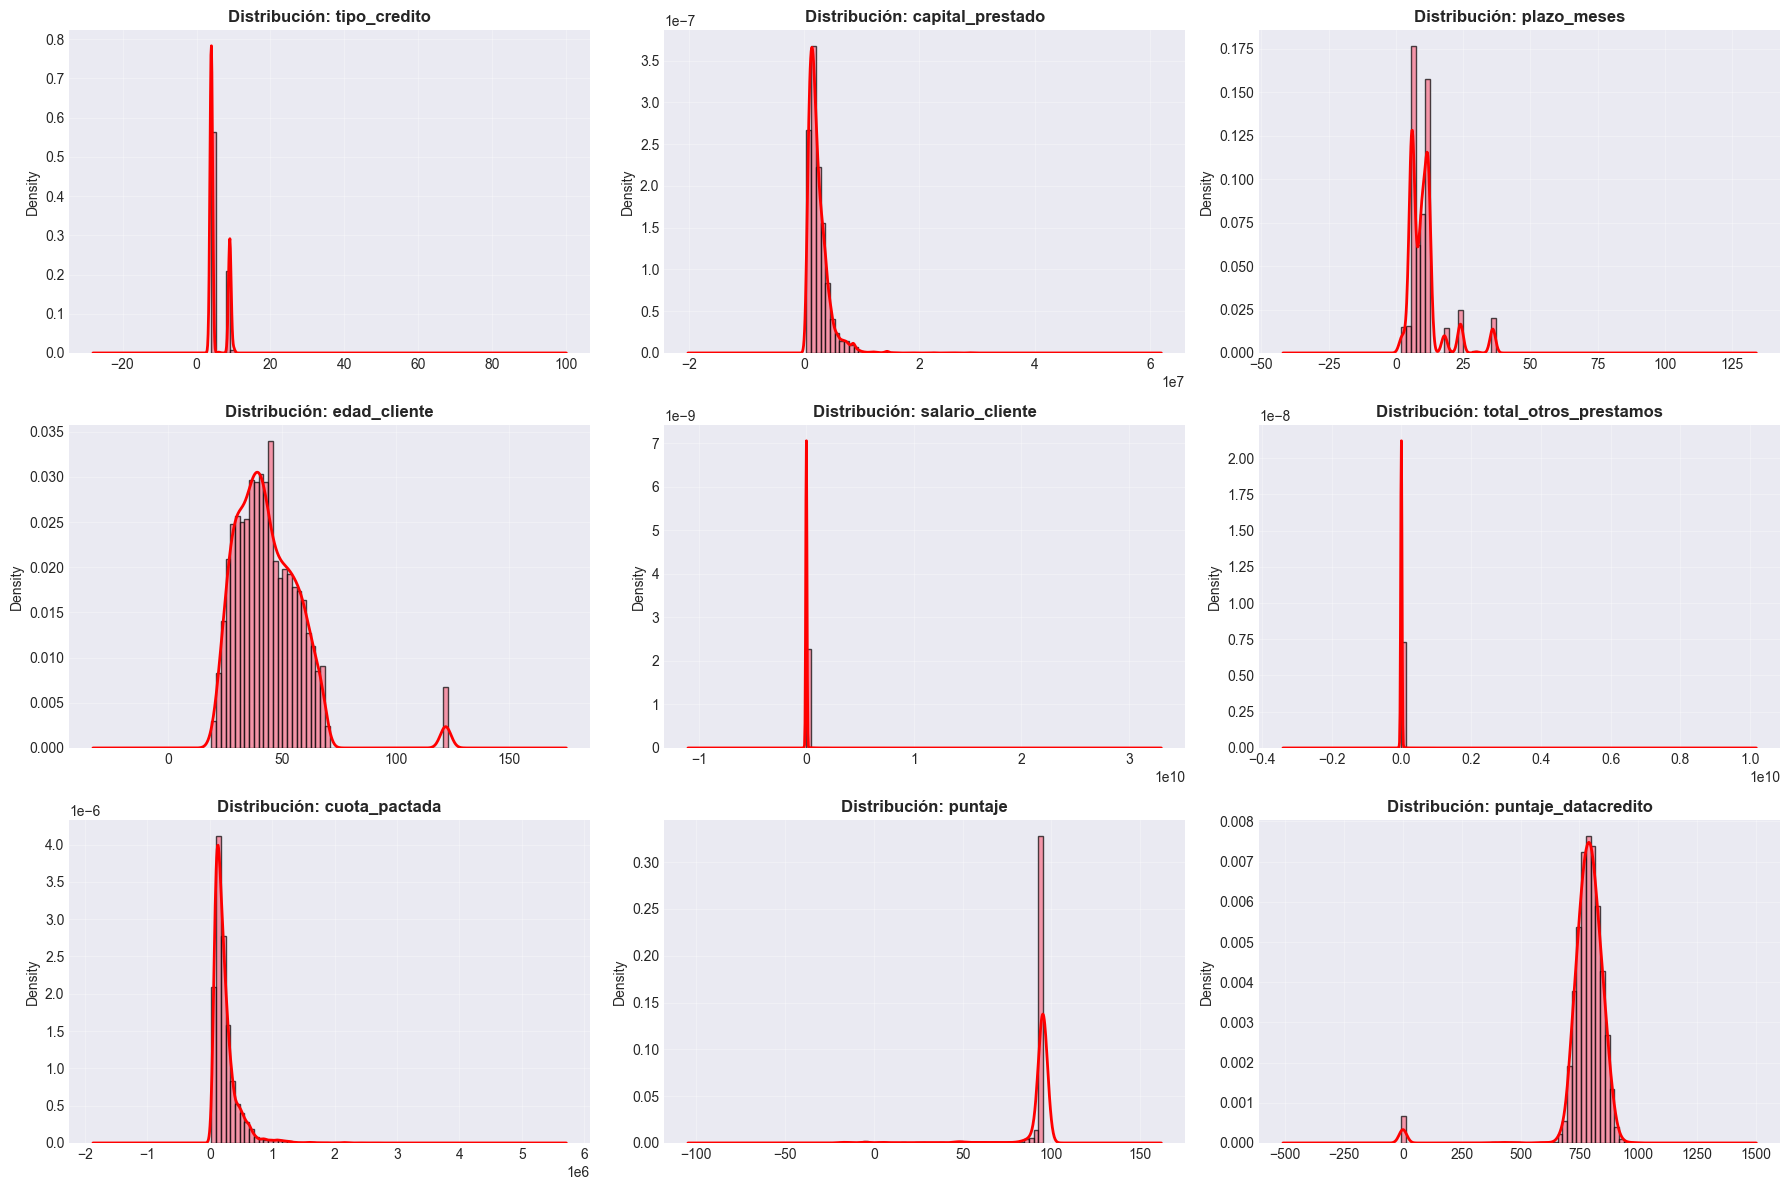

In [13]:
# Visualización: Histogramas y boxplots para variables numéricas
def plot_distribucion_numerica(df, columnas, filas=4, columnas_grafico=3):
    """
    Crea histogramas y boxplots para variables numéricas
    """
    n_cols = len(columnas)
    n_filas = (n_cols // columnas_grafico) + (1 if n_cols % columnas_grafico > 0 else 0)
    
    fig, axes = plt.subplots(n_filas, columnas_grafico, figsize=(18, n_filas * 4))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(columnas):
        # Histograma con KDE
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, density=True)
        df[col].dropna().plot(kind='kde', ax=axes[idx], color='red', linewidth=2)
        axes[idx].set_title(f'Distribución: {col}', fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].grid(alpha=0.3)
    
    # Ocultar ejes vacíos
    for idx in range(n_cols, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Distribuciones de Variables Numéricas:")
plot_distribucion_numerica(df, columnas_numericas[:9])  # Primeras 9 variables

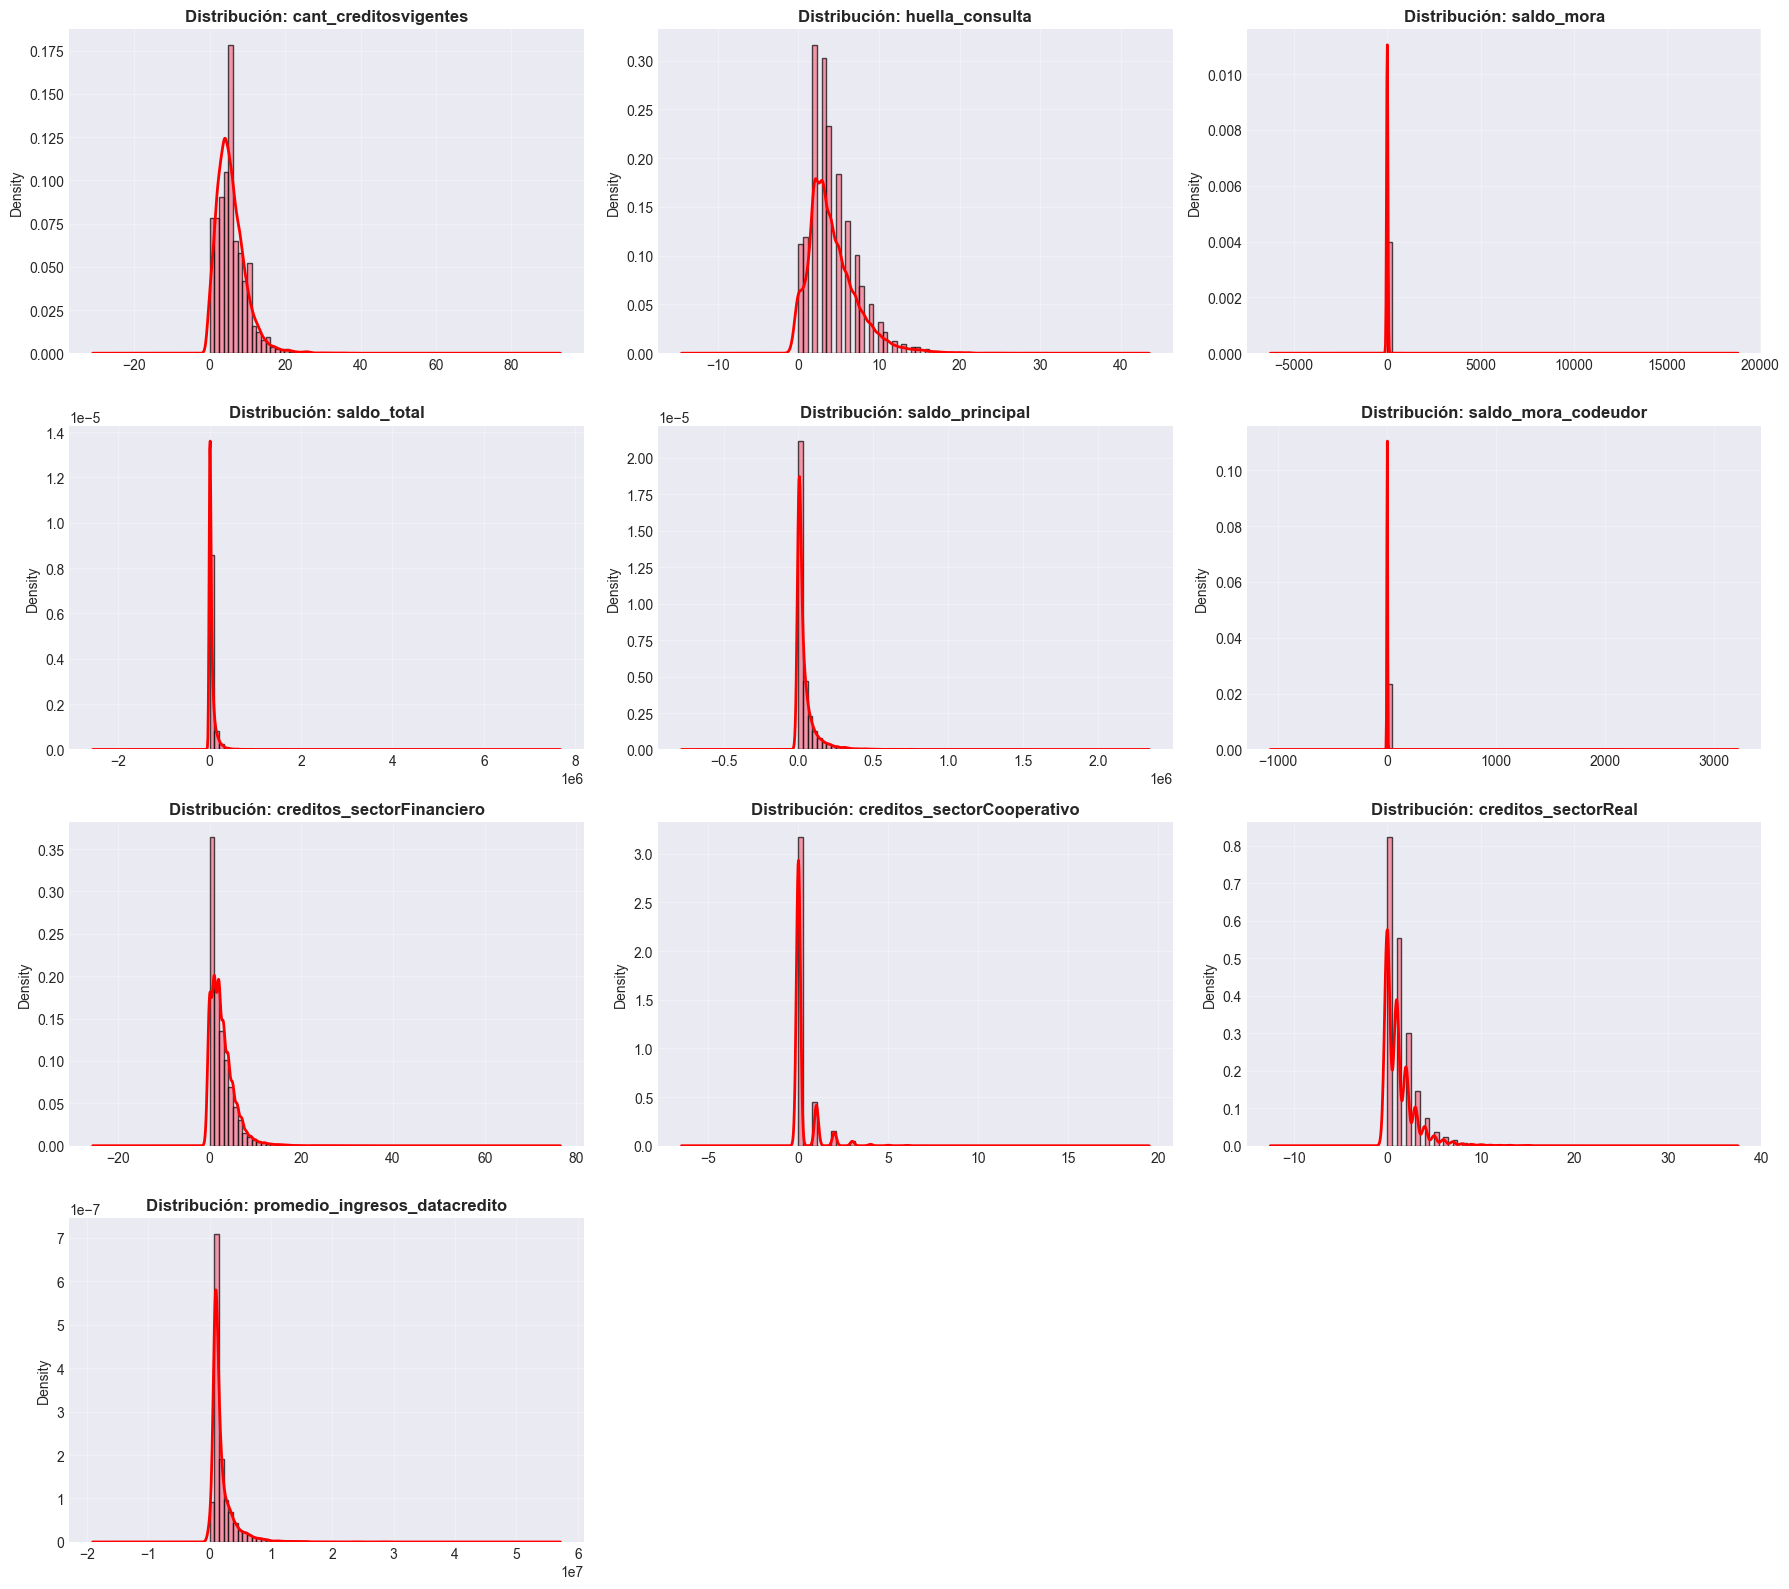

In [14]:
# Continuar con más variables si hay más de 9
if len(columnas_numericas) > 9:
    plot_distribucion_numerica(df, columnas_numericas[9:])


Boxplots para Detección de Outliers:


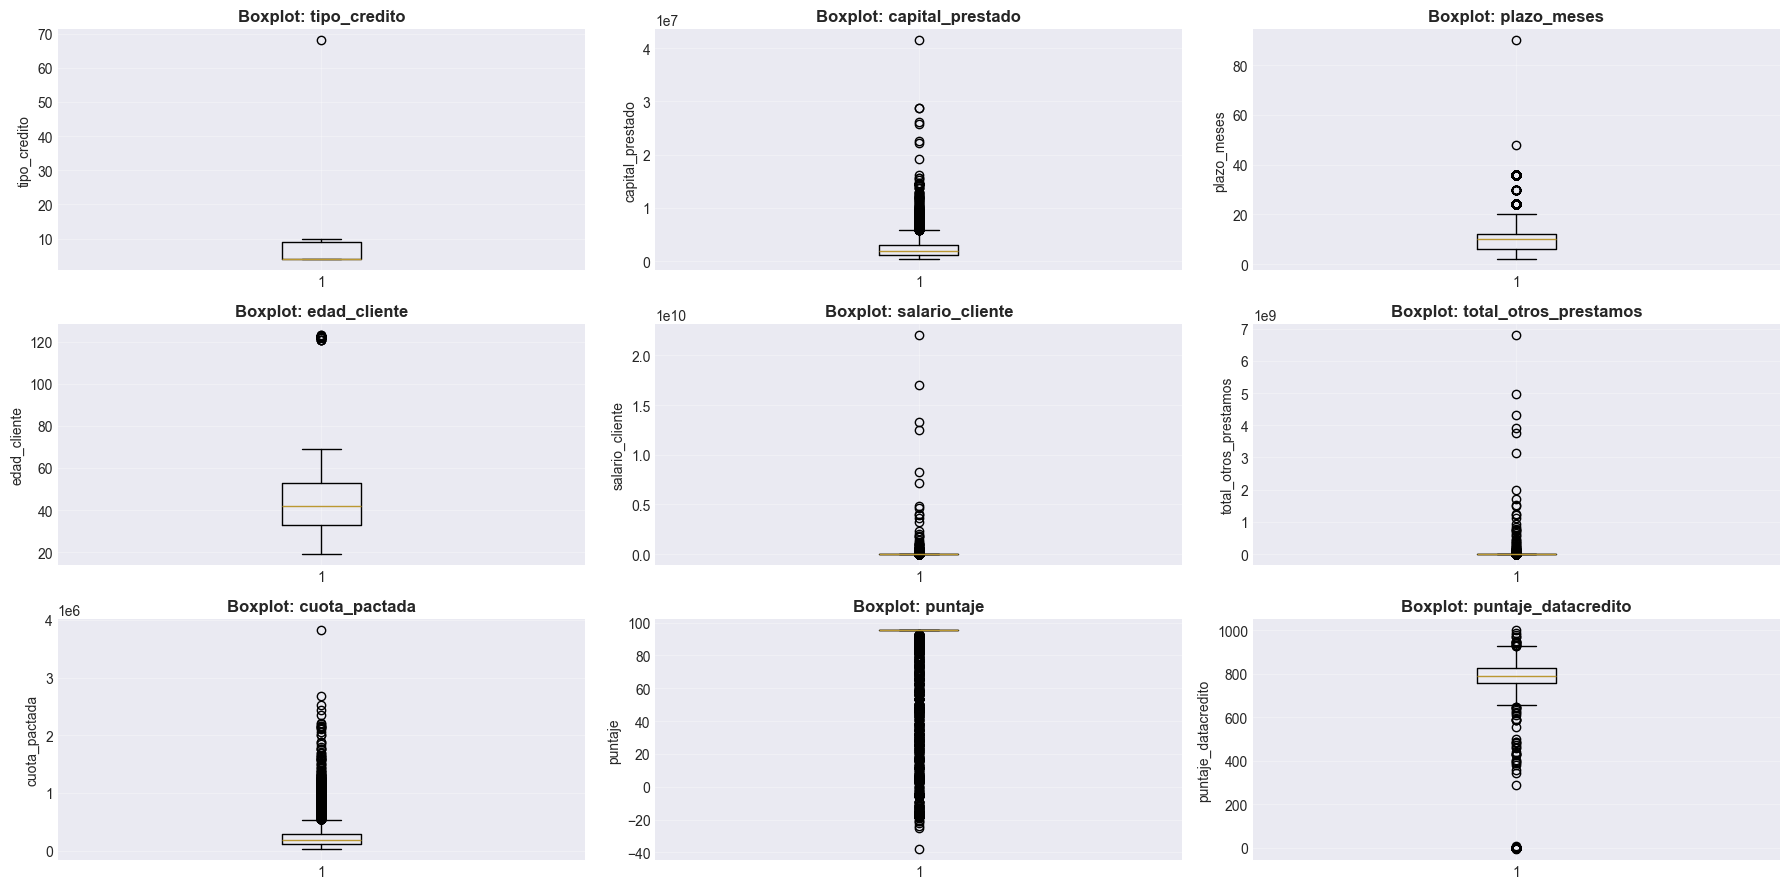

In [15]:
# Boxplots para detectar outliers
def plot_boxplots(df, columnas, filas=4, columnas_grafico=3):
    """
    Crea boxplots para variables numéricas
    """
    n_cols = len(columnas)
    n_filas = (n_cols // columnas_grafico) + (1 if n_cols % columnas_grafico > 0 else 0)
    
    fig, axes = plt.subplots(n_filas, columnas_grafico, figsize=(18, n_filas * 3))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(columnas):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(alpha=0.3)
    
    # Ocultar ejes vacíos
    for idx in range(n_cols, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\nBoxplots para Detección de Outliers:")
plot_boxplots(df, columnas_numericas[:9])

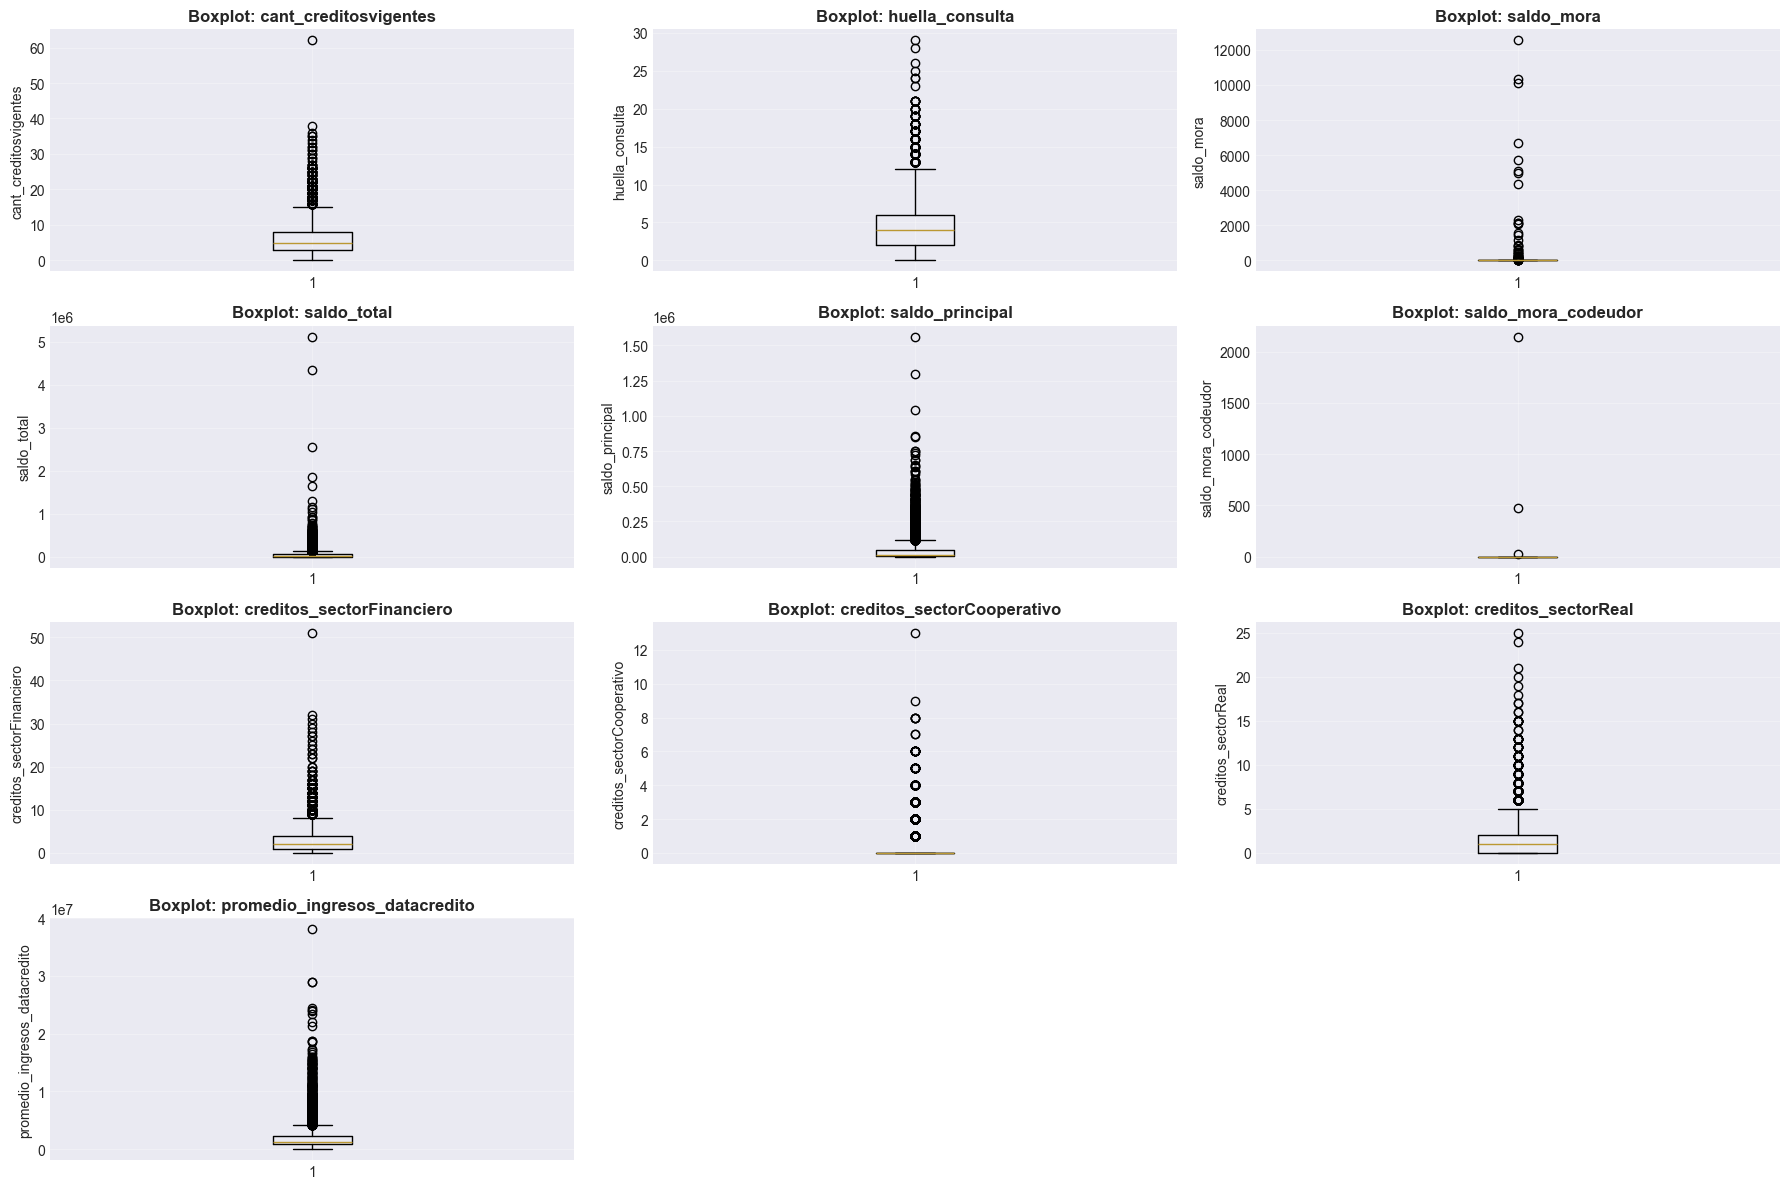

In [16]:
if len(columnas_numericas) > 9:
    plot_boxplots(df, columnas_numericas[9:])

In [17]:
# Análisis de outliers usando IQR
def analizar_outliers(df, columnas):
    """
    Detecta outliers usando el método IQR
    """
    resultados = []
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
        
        resultados.append({
            'Variable': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite_Inferior': limite_inferior,
            'Limite_Superior': limite_superior,
            'N_Outliers': len(outliers),
            'Porcentaje_Outliers': (len(outliers) / len(df)) * 100
        })
    
    return pd.DataFrame(resultados)

print("="*80)
print("ANÁLISIS DE OUTLIERS (MÉTODO IQR)")
print("="*80)
outliers_df = analizar_outliers(df, columnas_numericas)
print(outliers_df.to_string(index=False))

ANÁLISIS DE OUTLIERS (MÉTODO IQR)
                     Variable          Q1          Q3         IQR  Limite_Inferior  Limite_Superior  N_Outliers  Porcentaje_Outliers
                 tipo_credito       4.000       9.000       5.000           -3.500           16.500           1                0.009
             capital_prestado 1224831.000 3084840.000 1860009.000     -1565182.500      5874853.500         550                5.110
                  plazo_meses       6.000      12.000       6.000           -3.000           21.000         869                8.074
                 edad_cliente      33.000      53.000      20.000            3.000           83.000         150                1.394
              salario_cliente 2000000.000 4875808.000 2875808.000     -2313712.000      9189520.000         718                6.671
        total_otros_prestamos  500000.000 2000000.000 1500000.000     -1750000.000      4250000.000         589                5.472
                cuota_pactada  1210

### 3.2 Variables Categóricas

In [18]:
# Estadísticas descriptivas para variables categóricas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*80)

for col in columnas_categoricas:
    print(f"\n{'='*60}")
    print(f"Variable: {col}")
    print(f"{'='*60}")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"Valor más frecuente: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"\nDistribución de frecuencias:")
    
    frecuencias = df[col].value_counts()
    frecuencias_pct = df[col].value_counts(normalize=True) * 100
    
    resumen = pd.DataFrame({
        'Frecuencia': frecuencias,
        'Porcentaje': frecuencias_pct
    })
    
    print(resumen.head(10))  # Mostrar top 10 categorías

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

Variable: tipo_laboral
Valores únicos: 2
Valor más frecuente: Empleado

Distribución de frecuencias:
               Frecuencia  Porcentaje
tipo_laboral                         
Empleado             6754      62.752
Independiente        4009      37.248

Variable: tendencia_ingresos
Valores únicos: 46
Valor más frecuente: Creciente

Distribución de frecuencias:
                    Frecuencia  Porcentaje
tendencia_ingresos                        
Creciente                 5294      67.603
Decreciente               1291      16.486
Estable                   1188      15.170
0                            7       0.089
8315                         6       0.077
1000000                      4       0.051
9147                         2       0.026
158042                       1       0.013
168750                       1       0.013
3978                         1       0.013


Distribuciones de Variables Categóricas:


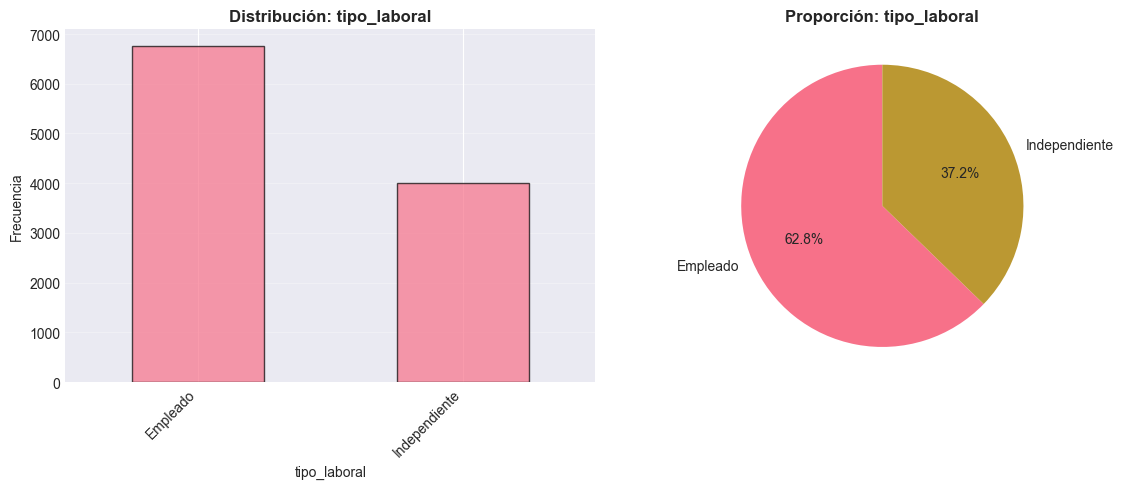

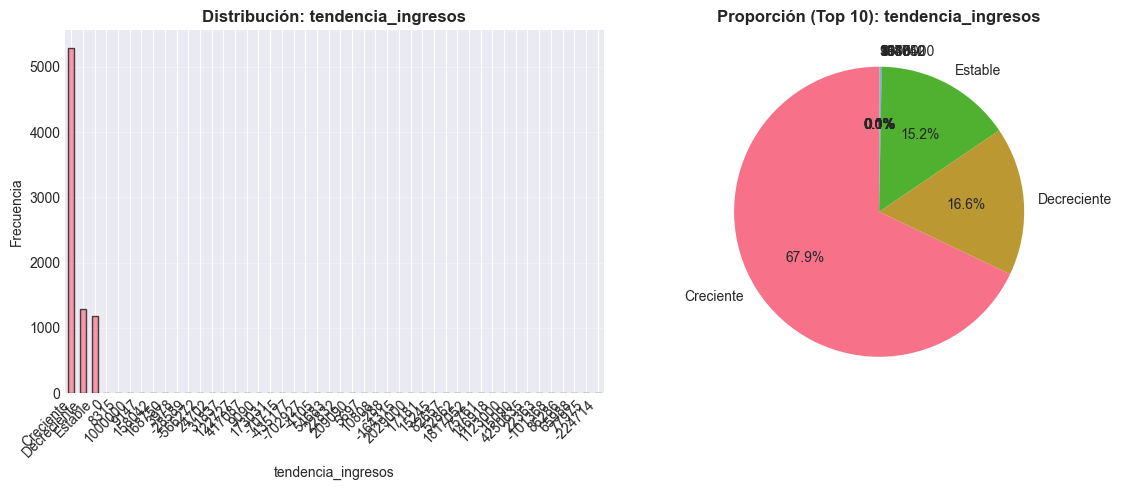

In [19]:
# Visualización de variables categóricas
def plot_categoricas(df, columnas):
    """
    Crea gráficos de barras para variables categóricas
    """
    for col in columnas:
        plt.figure(figsize=(12, 5))
        
        # Countplot
        value_counts = df[col].value_counts()
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title(f'Distribución: {col}', fontweight='bold', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        if len(value_counts) <= 10:  # Solo si hay pocas categorías
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Proporción: {col}', fontweight='bold', fontsize=12)
        else:
            top10 = value_counts.head(10)
            plt.pie(top10, labels=top10.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Proporción (Top 10): {col}', fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.show()

print("Distribuciones de Variables Categóricas:")
plot_categoricas(df, columnas_categoricas)

## 4. Análisis Bivariable

### 4.1 Relación con la Variable Objetivo

In [20]:
# Distribución de la variable objetivo
print("="*80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: Pago_atiempo")
print("="*80)

distribucion_objetivo = df[variable_objetivo].value_counts().sort_index()
distribucion_pct = df[variable_objetivo].value_counts(normalize=True).sort_index() * 100

print(f"\nDistribución:")
print(f"  Clase 0 (No pagó a tiempo): {distribucion_objetivo[0]:,} ({distribucion_pct[0]:.2f}%)")
print(f"  Clase 1 (Pagó a tiempo): {distribucion_objetivo[1]:,} ({distribucion_pct[1]:.2f}%)")

ratio = min(distribucion_objetivo) / max(distribucion_objetivo)
print(f"\nRatio de balance: {ratio:.3f}")

if ratio < 0.5:
    print("⚠️  Dataset desbalanceado - Considerar técnicas de balanceo")
else:
    print("✓ Dataset razonablemente balanceado")

ANÁLISIS DE LA VARIABLE OBJETIVO: Pago_atiempo

Distribución:
  Clase 0 (No pagó a tiempo): 511 (4.75%)
  Clase 1 (Pagó a tiempo): 10,252 (95.25%)

Ratio de balance: 0.050
⚠️  Dataset desbalanceado - Considerar técnicas de balanceo


In [21]:
# Variables numéricas vs Variable objetivo
def analizar_numerica_vs_objetivo(df, columnas_num, var_objetivo):
    """
    Analiza la relación entre variables numéricas y la variable objetivo
    """
    resultados = []
    
    for col in columnas_num:
        # Estadísticas por clase
        clase_0 = df[df[var_objetivo] == 0][col]
        clase_1 = df[df[var_objetivo] == 1][col]
        
        # Test estadístico (t-test)
        try:
            t_stat, p_value = stats.ttest_ind(clase_0.dropna(), clase_1.dropna())
        except:
            t_stat, p_value = np.nan, np.nan
        
        resultados.append({
            'Variable': col,
            'Media_Clase_0': clase_0.mean(),
            'Media_Clase_1': clase_1.mean(),
            'Mediana_Clase_0': clase_0.median(),
            'Mediana_Clase_1': clase_1.median(),
            'Diferencia_Medias': abs(clase_0.mean() - clase_1.mean()),
            'p_value': p_value,
            'Significativa': 'Sí' if p_value < 0.05 else 'No'
        })
    
    return pd.DataFrame(resultados).sort_values('p_value')

print("="*80)
print("ANÁLISIS BIVARIABLE: VARIABLES NUMÉRICAS VS OBJETIVO")
print("="*80)
analisis_num_objetivo = analizar_numerica_vs_objetivo(df, columnas_numericas, variable_objetivo)
print(analisis_num_objetivo.to_string(index=False))

ANÁLISIS BIVARIABLE: VARIABLES NUMÉRICAS VS OBJETIVO
                     Variable  Media_Clase_0  Media_Clase_1  Mediana_Clase_0  Mediana_Clase_1  Diferencia_Medias  p_value Significativa
                      puntaje         23.091         94.563           25.419           95.228             71.472    0.000            Sí
              huella_consulta          5.241          4.178            5.000            4.000              1.063    0.000            Sí
                   saldo_mora         82.368          4.054            0.000            0.000             78.314    0.000            Sí
          puntaje_datacredito        748.880        782.379          768.000          792.000             33.499    0.000            Sí
                  plazo_meses         12.450         10.482           10.000           10.000              1.968    0.000            Sí
             capital_prestado    2781774.113    2416996.273      2268000.000      1908446.400         364777.840    0.000          


Boxplots de Variables Más Significativas por Clase:


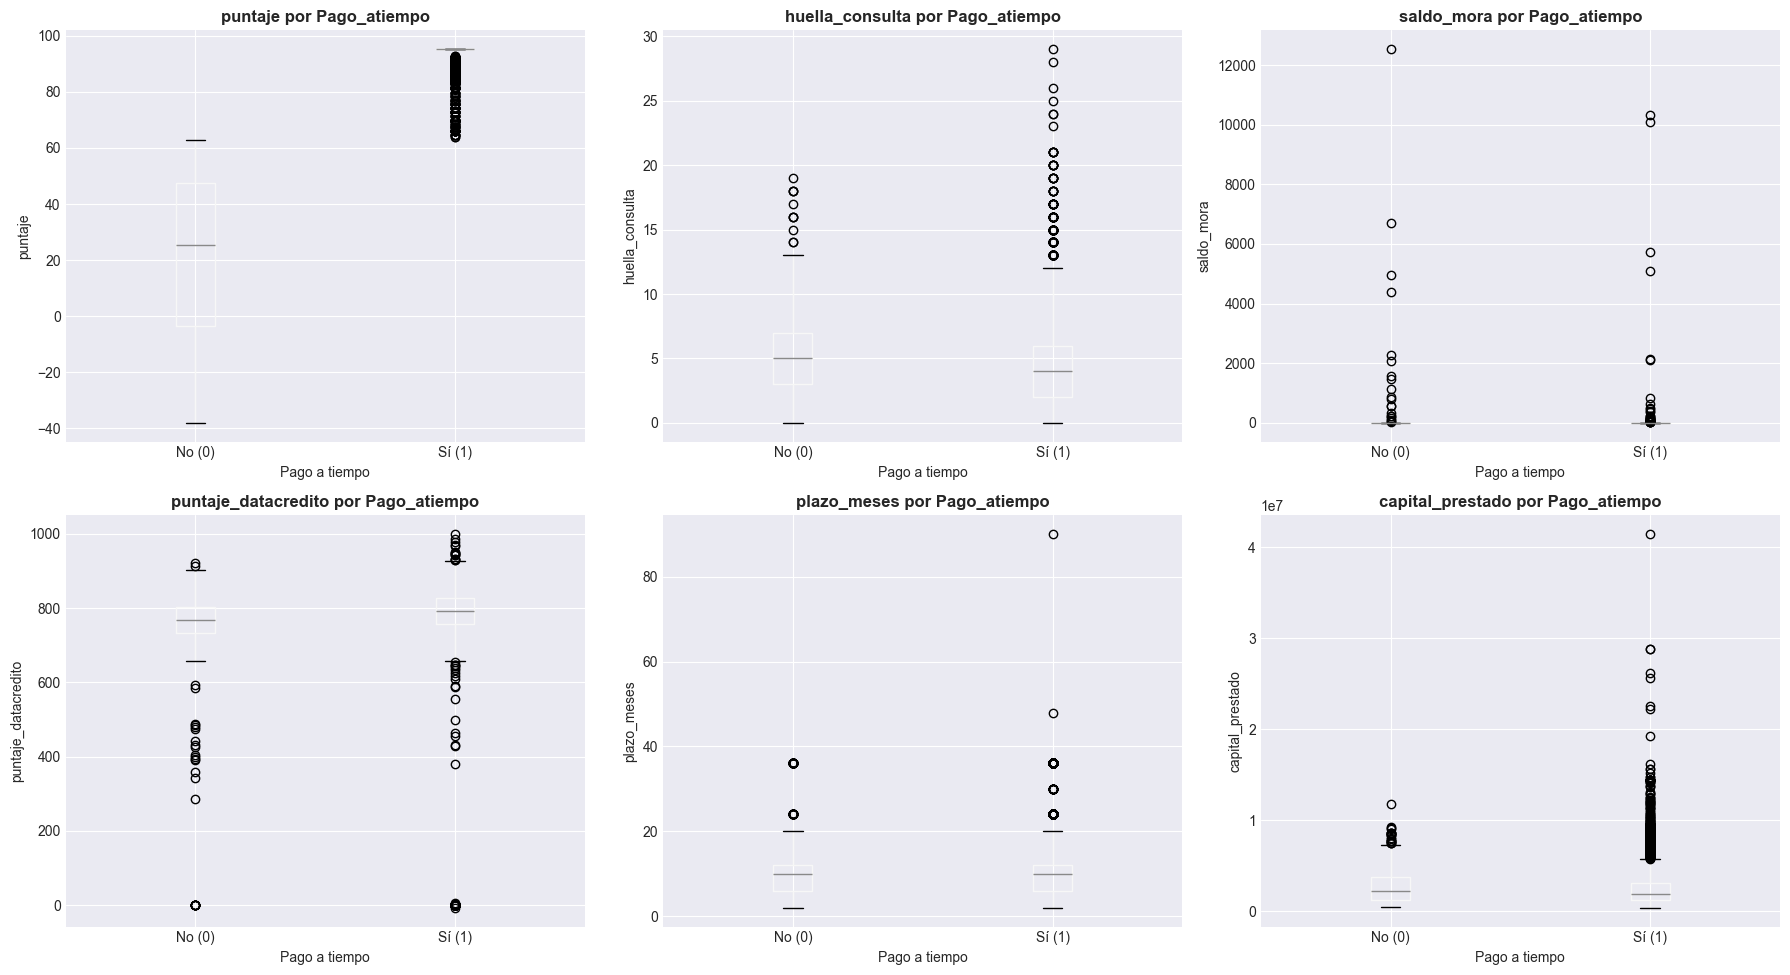

In [22]:
# Visualización: Boxplots por clase objetivo
def plot_boxplots_por_clase(df, columnas_num, var_objetivo, n_vars=6):
    """
    Crea boxplots comparando distribuciones por clase objetivo
    """
    # Seleccionar variables más significativas
    vars_significativas = analisis_num_objetivo.head(n_vars)['Variable'].tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(vars_significativas):
        df.boxplot(column=col, by=var_objetivo, ax=axes[idx])
        axes[idx].set_title(f'{col} por Pago_atiempo', fontweight='bold')
        axes[idx].set_xlabel('Pago a tiempo')
        axes[idx].set_ylabel(col)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['No (0)', 'Sí (1)'])
    
    plt.suptitle('')  # Eliminar título automático de pandas
    plt.tight_layout()
    plt.show()

print("\nBoxplots de Variables Más Significativas por Clase:")
plot_boxplots_por_clase(df, columnas_numericas, variable_objetivo)

In [23]:
# Variables categóricas vs Variable objetivo
def analizar_categorica_vs_objetivo(df, columnas_cat, var_objetivo):
    """
    Analiza la relación entre variables categóricas y la variable objetivo
    """
    resultados = []
    
    for col in columnas_cat:
        # Tabla de contingencia
        tabla_contingencia = pd.crosstab(df[col], df[var_objetivo])
        
        # Test Chi-cuadrado
        try:
            chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
        except:
            chi2, p_value = np.nan, np.nan
        
        # Cramér's V (medida de asociación)
        n = tabla_contingencia.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1))) if not np.isnan(chi2) else np.nan
        
        resultados.append({
            'Variable': col,
            'Categorias_Unicas': df[col].nunique(),
            'Chi2': chi2,
            'p_value': p_value,
            'Cramers_V': cramers_v,
            'Significativa': 'Sí' if p_value < 0.05 else 'No'
        })
    
    return pd.DataFrame(resultados).sort_values('p_value')

if len(columnas_categoricas) > 0:
    print("\n" + "="*80)
    print("ANÁLISIS BIVARIABLE: VARIABLES CATEGÓRICAS VS OBJETIVO")
    print("="*80)
    analisis_cat_objetivo = analizar_categorica_vs_objetivo(df, columnas_categoricas, variable_objetivo)
    print(analisis_cat_objetivo.to_string(index=False))


ANÁLISIS BIVARIABLE: VARIABLES CATEGÓRICAS VS OBJETIVO
          Variable  Categorias_Unicas   Chi2  p_value  Cramers_V Significativa
      tipo_laboral                  2  7.997    0.005      0.027            Sí
tendencia_ingresos                 46 16.685    1.000      0.046            No


<Figure size 1200x500 with 0 Axes>

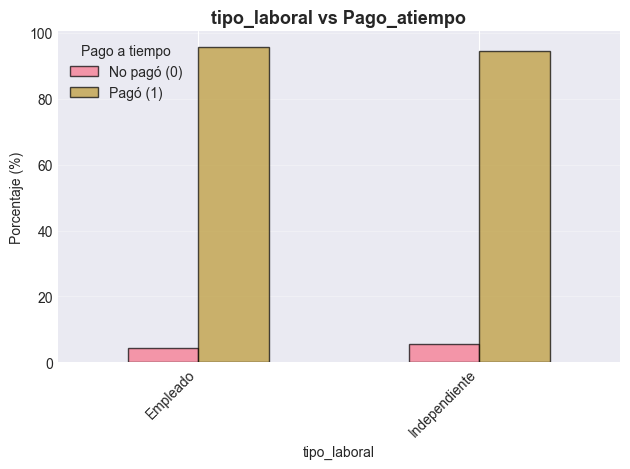

<Figure size 1200x500 with 0 Axes>

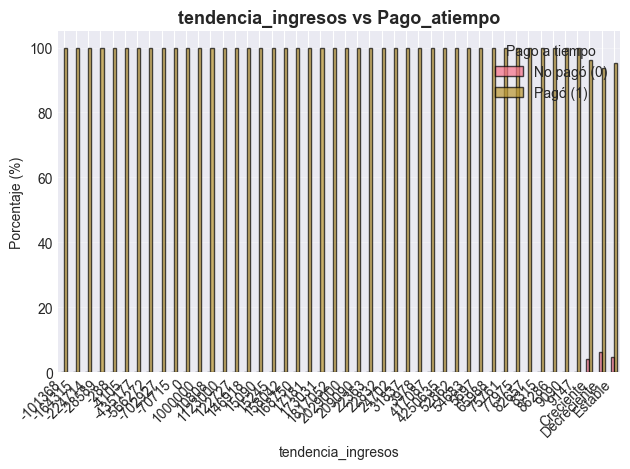

In [24]:
# Visualización: Gráficos de barras agrupadas
if len(columnas_categoricas) > 0:
    for col in columnas_categoricas:
        plt.figure(figsize=(12, 5))
        
        # Tabla de contingencia normalizada
        tabla = pd.crosstab(df[col], df[variable_objetivo], normalize='index') * 100
        
        tabla.plot(kind='bar', stacked=False, edgecolor='black', alpha=0.7)
        plt.title(f'{col} vs Pago_atiempo', fontweight='bold', fontsize=13)
        plt.xlabel(col)
        plt.ylabel('Porcentaje (%)')
        plt.legend(['No pagó (0)', 'Pagó (1)'], title='Pago a tiempo')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

## 5. Análisis Multivariable

### 5.1 Matriz de Correlación

MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS


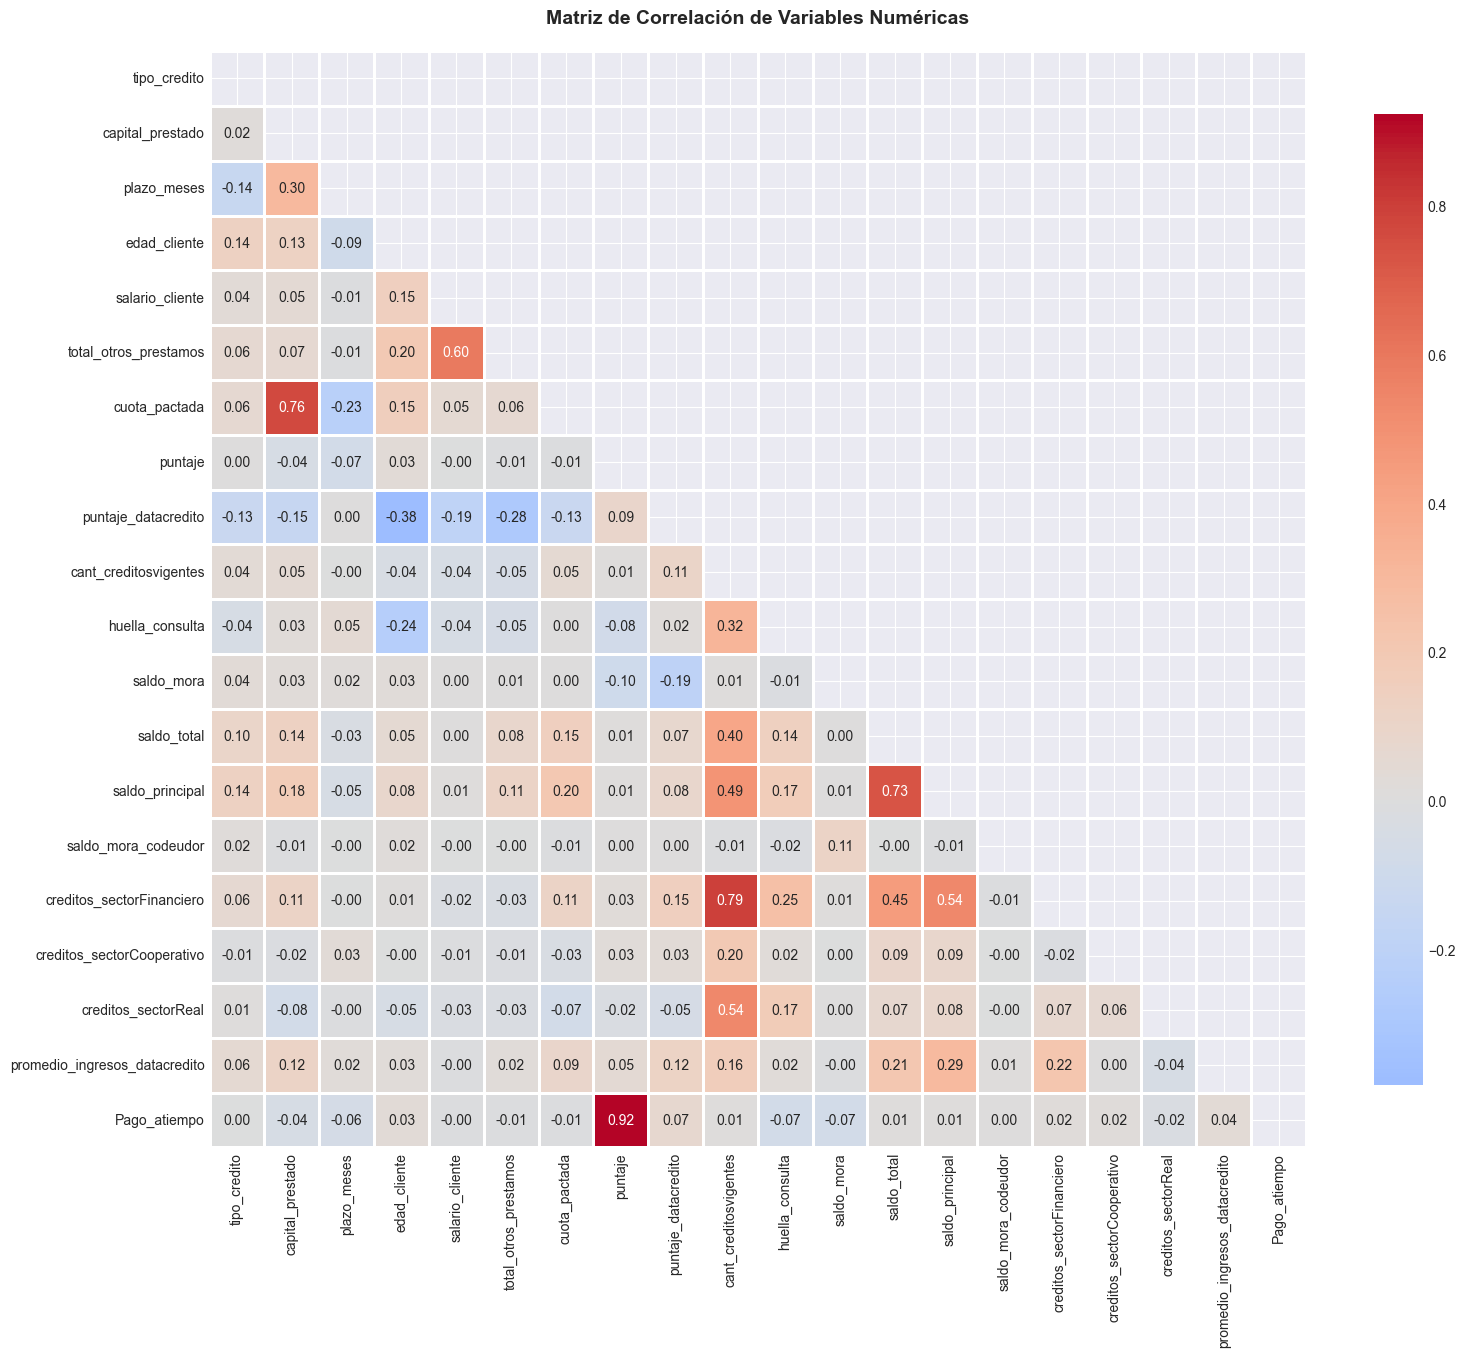

In [25]:
# Calcular matriz de correlación
print("="*80)
print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("="*80)

# Incluir variable objetivo en la correlación
cols_para_corr = columnas_numericas + [variable_objetivo]
correlacion = df[cols_para_corr].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlacion, dtype=bool))  # Máscara para triángulo superior
sns.heatmap(correlacion, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [26]:
# Identificar correlaciones fuertes
print("\n" + "="*80)
print("CORRELACIONES FUERTES (|r| > 0.7)")
print("="*80)

# Obtener correlaciones significativas (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.7:
            correlaciones_fuertes.append({
                'Variable_1': correlacion.columns[i],
                'Variable_2': correlacion.columns[j],
                'Correlacion': correlacion.iloc[i, j]
            })

if correlaciones_fuertes:
    df_corr_fuertes = pd.DataFrame(correlaciones_fuertes).sort_values('Correlacion', 
                                                                        key=abs, ascending=False)
    print(df_corr_fuertes.to_string(index=False))
    print("\n⚠️  Advertencia: Variables con correlación muy alta pueden causar multicolinealidad")
else:
    print("No se encontraron correlaciones fuertes (|r| > 0.7)")


CORRELACIONES FUERTES (|r| > 0.7)
           Variable_1                Variable_2  Correlacion
              puntaje              Pago_atiempo        0.923
cant_creditosvigentes creditos_sectorFinanciero        0.791
     capital_prestado             cuota_pactada        0.764
          saldo_total           saldo_principal        0.735

⚠️  Advertencia: Variables con correlación muy alta pueden causar multicolinealidad



CORRELACIÓN CON LA VARIABLE OBJETIVO
puntaje                          0.923
huella_consulta                 -0.074
saldo_mora                      -0.073
puntaje_datacredito              0.068
plazo_meses                     -0.063
capital_prestado                -0.041
promedio_ingresos_datacredito    0.040
edad_cliente                     0.032
creditos_sectorReal             -0.023
creditos_sectorFinanciero        0.021
creditos_sectorCooperativo       0.021
saldo_total                      0.014
cuota_pactada                   -0.012
saldo_principal                  0.011
total_otros_prestamos           -0.010
cant_creditosvigentes            0.009
salario_cliente                 -0.004
saldo_mora_codeudor              0.003
tipo_credito                     0.001
Name: Pago_atiempo, dtype: float64


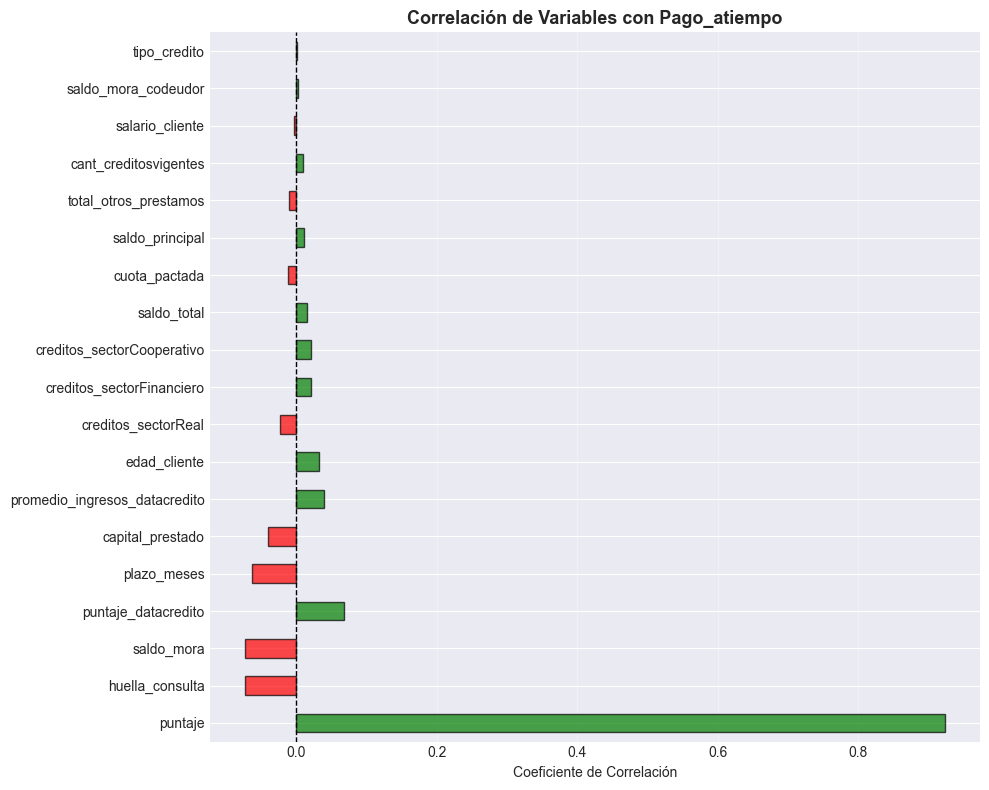

In [27]:
# Correlación con la variable objetivo
print("\n" + "="*80)
print("CORRELACIÓN CON LA VARIABLE OBJETIVO")
print("="*80)

correlacion_objetivo = correlacion[variable_objetivo].drop(variable_objetivo).sort_values(
    key=abs, ascending=False
)

print(correlacion_objetivo)

# Visualización
plt.figure(figsize=(10, 8))
correlacion_objetivo.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlacion_objetivo],
                          edgecolor='black', alpha=0.7)
plt.title('Correlación de Variables con Pago_atiempo', fontsize=13, fontweight='bold')
plt.xlabel('Coeficiente de Correlación')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Pairplot de Variables Clave

Creando pairplot con las variables más relevantes: ['puntaje', 'huella_consulta', 'saldo_mora', 'puntaje_datacredito', 'plazo_meses']
Esto puede tomar unos momentos...


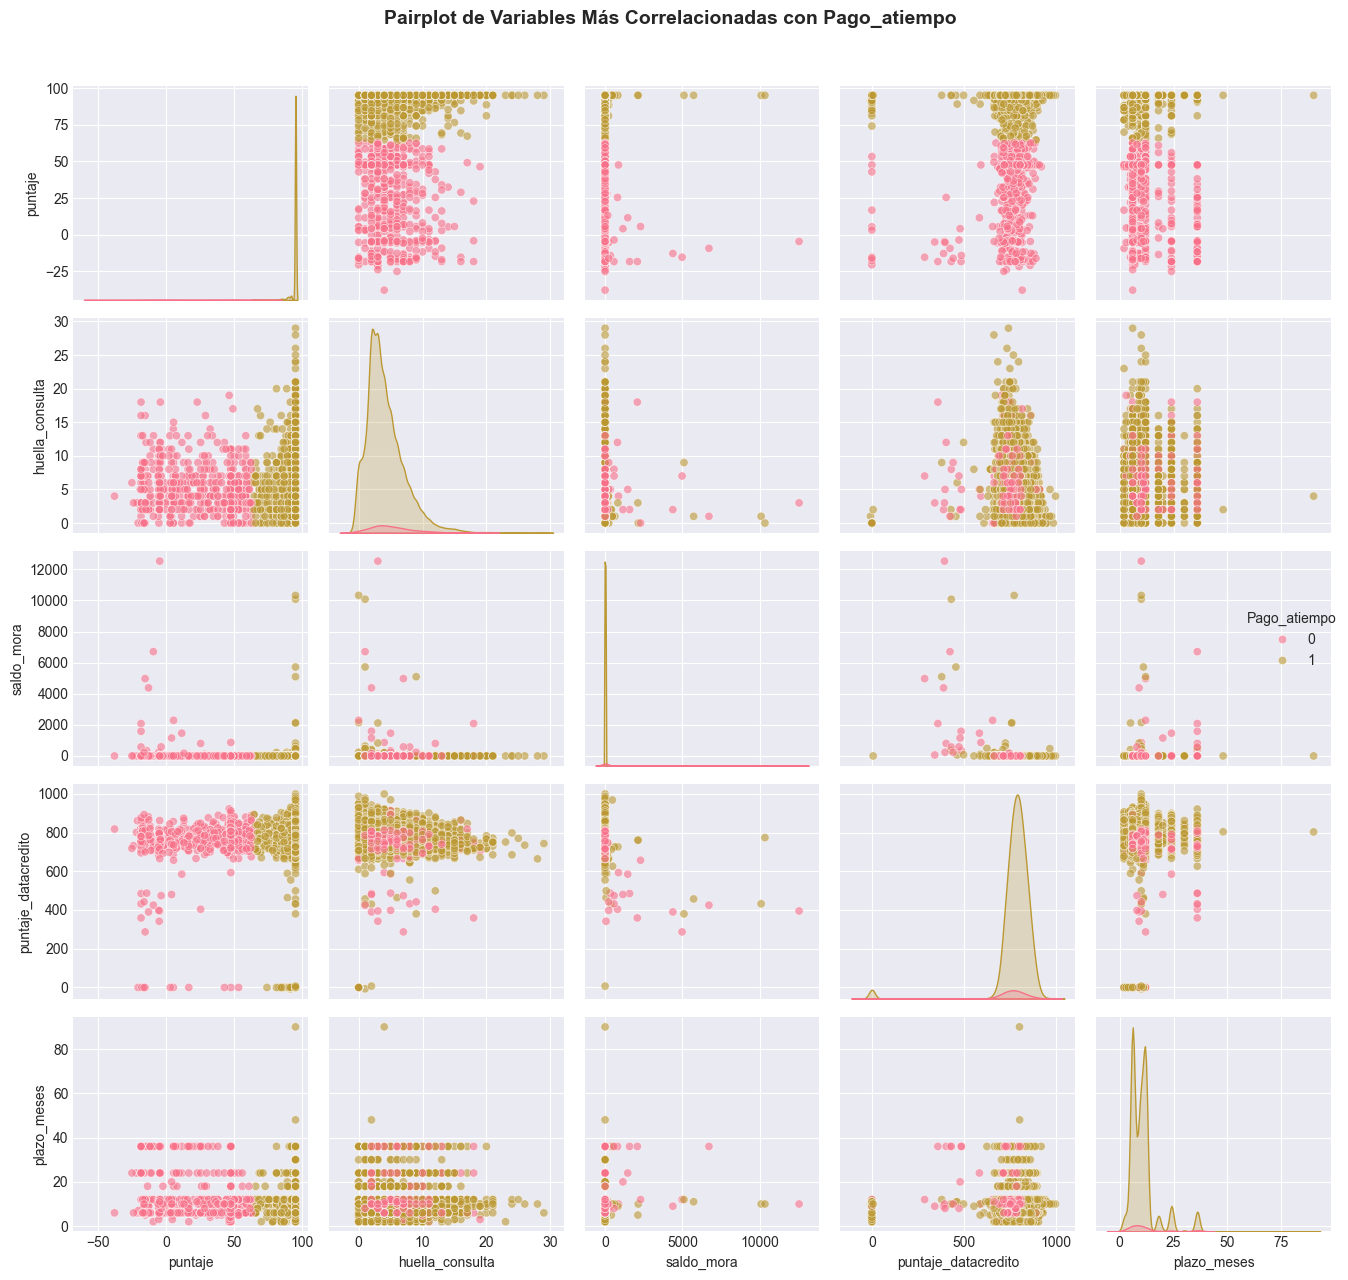

In [28]:
# Seleccionar las 5 variables más correlacionadas con el objetivo
top_vars = correlacion_objetivo.head(5).index.tolist()
cols_pairplot = top_vars + [variable_objetivo]

print(f"Creando pairplot con las variables más relevantes: {top_vars}")
print("Esto puede tomar unos momentos...")

# Crear pairplot
sns.pairplot(df[cols_pairplot], hue=variable_objetivo, diag_kind='kde', 
             plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot de Variables Más Correlacionadas con Pago_atiempo', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Reglas de Validación de Datos

Basándonos en el EDA, establecemos reglas de validación para el pipeline.

In [29]:
print("="*80)
print("REGLAS DE VALIDACIÓN DE DATOS")
print("="*80)

reglas_validacion = {
    'tipo_credito': {
        'tipo': 'int',
        'rango': (df['tipo_credito'].min(), df['tipo_credito'].max()),
        'permite_nulos': False
    },
    'fecha_prestamo': {
        'tipo': 'datetime',
        'rango': (df['fecha_prestamo'].min(), df['fecha_prestamo'].max()),
        'permite_nulos': False
    },
    'capital_prestado': {
        'tipo': 'float',
        'rango': (0, df['capital_prestado'].quantile(0.99)),
        'permite_nulos': True
    },
    'plazo_meses': {
        'tipo': 'int',
        'rango': (1, 360),
        'permite_nulos': False
    },
    'edad_cliente': {
        'tipo': 'int',
        'rango': (18, 100),
        'permite_nulos': False
    },
    'tipo_laboral': {
        'tipo': 'str',
        'valores_validos': df['tipo_laboral'].dropna().unique().tolist(),
        'permite_nulos': True
    },
    'salario_cliente': {
        'tipo': 'int',
        'rango': (0, df['salario_cliente'].quantile(0.99)),
        'permite_nulos': False
    },
    'Pago_atiempo': {
        'tipo': 'int',
        'valores_validos': [0, 1],
        'permite_nulos': False
    }
}

print("\nReglas de validación definidas:")
for variable, reglas in reglas_validacion.items():
    print(f"\n{variable}:")
    for regla, valor in reglas.items():
        print(f"  - {regla}: {valor}")

print("\n✓ Reglas de validación establecidas")

REGLAS DE VALIDACIÓN DE DATOS

Reglas de validación definidas:

tipo_credito:
  - tipo: int
  - rango: (np.int64(4), np.int64(68))
  - permite_nulos: False

fecha_prestamo:
  - tipo: datetime
  - rango: (Timestamp('2024-11-26 09:17:04'), Timestamp('2026-04-26 18:43:52'))
  - permite_nulos: False

capital_prestado:
  - tipo: float
  - rango: (0, np.float64(8881109.759999987))
  - permite_nulos: True

plazo_meses:
  - tipo: int
  - rango: (1, 360)
  - permite_nulos: False

edad_cliente:
  - tipo: int
  - rango: (18, 100)
  - permite_nulos: False

tipo_laboral:
  - tipo: str
  - valores_validos: ['Independiente', 'Empleado']
  - permite_nulos: True

salario_cliente:
  - tipo: int
  - rango: (0, np.float64(39553562.179999426))
  - permite_nulos: False

Pago_atiempo:
  - tipo: int
  - valores_validos: [0, 1]
  - permite_nulos: False

✓ Reglas de validación establecidas


## 7. Transformaciones Identificadas

Documentamos las transformaciones necesarias para la fase de Feature Engineering.

In [30]:
print("="*80)
print("TRANSFORMACIONES IDENTIFICADAS PARA FEATURE ENGINEERING")
print("="*80)

transformaciones = {
    '1. Tratamiento de Nulos': [
        f"- tendencia_ingresos: {df['tendencia_ingresos'].isnull().sum()} nulos -> Imputar con moda o categoría 'Desconocido'",
        f"- puntaje: {df['puntaje'].isnull().sum()} nulos -> Imputar con mediana o media",
        f"- capital_prestado: {df['capital_prestado'].isnull().sum()} nulos -> Imputar con mediana"
    ],
    '2. Encoding de Variables Categóricas': [
        "- tipo_laboral: One-Hot Encoding o Label Encoding",
        "- tendencia_ingresos: Ordinal Encoding (Decreciente < Estable < Creciente)"
    ],
    '3. Escalado de Variables Numéricas': [
        "- Aplicar StandardScaler o MinMaxScaler a todas las variables numéricas",
        "- Considerar RobustScaler para variables con outliers"
    ],
    '4. Feature Engineering': [
        "- Crear 'ratio_cuota_salario': cuota_pactada / salario_cliente",
        "- Crear 'total_deuda': saldo_total + saldo_mora",
        "- Crear 'antiguedad_credito': días desde fecha_prestamo",
        "- Crear 'ratio_otros_prestamos': total_otros_prestamos / salario_cliente",
        "- Binning de edad_cliente en grupos etarios"
    ],
    '5. Tratamiento de Outliers': [
        "- Aplicar Winsorization o Capping en variables con outliers extremos",
        "- Considerar transformaciones logarítmicas para variables asimétricas"
    ],
    '6. Balanceo de Clases': [
        f"- Ratio actual: {ratio:.3f}",
        "- Técnicas recomendadas: SMOTE, RandomUnderSampler o Class Weight"
    ] if ratio < 0.7 else ["- No es crítico balancear (ratio aceptable)"]
}

for categoria, items in transformaciones.items():
    print(f"\n{categoria}")
    for item in items:
        print(f"  {item}")

print("\n" + "="*80)

TRANSFORMACIONES IDENTIFICADAS PARA FEATURE ENGINEERING

1. Tratamiento de Nulos
  - tendencia_ingresos: 2932 nulos -> Imputar con moda o categoría 'Desconocido'
  - puntaje: 0 nulos -> Imputar con mediana o media
  - capital_prestado: 0 nulos -> Imputar con mediana

2. Encoding de Variables Categóricas
  - tipo_laboral: One-Hot Encoding o Label Encoding
  - tendencia_ingresos: Ordinal Encoding (Decreciente < Estable < Creciente)

3. Escalado de Variables Numéricas
  - Aplicar StandardScaler o MinMaxScaler a todas las variables numéricas
  - Considerar RobustScaler para variables con outliers

4. Feature Engineering
  - Crear 'ratio_cuota_salario': cuota_pactada / salario_cliente
  - Crear 'total_deuda': saldo_total + saldo_mora
  - Crear 'antiguedad_credito': días desde fecha_prestamo
  - Crear 'ratio_otros_prestamos': total_otros_prestamos / salario_cliente
  - Binning de edad_cliente en grupos etarios

5. Tratamiento de Outliers
  - Aplicar Winsorization o Capping en variables con o

## 8. Conclusiones y Recomendaciones

### 8.1 Resumen de Hallazgos

In [31]:
print("="*80)
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("="*80)

conclusiones = f"""
📊 RESUMEN DEL DATASET:
- Total de registros: {df.shape[0]:,}
- Variables numéricas: {len(columnas_numericas)}
- Variables categóricas: {len(columnas_categoricas)}
- Variables de fecha: {len(columnas_fecha)}
- Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

🎯 VARIABLE OBJETIVO:
- Distribución: Clase 0 ({distribucion_pct[0]:.1f}%), Clase 1 ({distribucion_pct[1]:.1f}%)
- Balance: {'Desbalanceado' if ratio < 0.5 else 'Aceptable'} (ratio: {ratio:.3f})

❓ CALIDAD DE DATOS:
- Total de nulos: {df.isnull().sum().sum():,} ({(df.isnull().sum().sum() / df.size * 100):.2f}%)
- Columnas con nulos: {len(resumen_con_nulos)}
- Variables a eliminar: {len(variables_a_eliminar)}

🔍 INSIGHTS PRINCIPALES:
1. Variables más correlacionadas con Pago_atiempo:
{chr(10).join([f'   - {var}: {correlacion_objetivo[var]:.3f}' for var in correlacion_objetivo.head(5).index])}

2. Outliers detectados:
{chr(10).join([f'   - {row["Variable"]}: {row["N_Outliers"]} outliers ({row["Porcentaje_Outliers"]:.1f}%)' for _, row in outliers_df.nlargest(3, 'N_Outliers').iterrows()])}

3. Variables con alta correlación entre sí:
{chr(10).join([f'   - {row["Variable_1"]} ↔ {row["Variable_2"]}: {row["Correlacion"]:.3f}' for _, row in df_corr_fuertes.head(3).iterrows()]) if correlaciones_fuertes else '   - No se detectaron correlaciones excesivamente altas'}

✅ RECOMENDACIONES:
1. Implementar pipeline robusto de limpieza de datos
2. Aplicar técnicas de imputación para valores nulos
3. Realizar feature engineering según transformaciones identificadas
4. Considerar balanceo de clases durante el entrenamiento
5. Implementar validación de datos según reglas establecidas
6. Monitorear drift de datos en producción

✓ Dataset listo para la fase de Feature Engineering
"""

print(conclusiones)
print("="*80)

CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

📊 RESUMEN DEL DATASET:
- Total de registros: 10,763
- Variables numéricas: 19
- Variables categóricas: 2
- Variables de fecha: 1
- Memoria utilizada: 2.85 MB

🎯 VARIABLE OBJETIVO:
- Distribución: Clase 0 (4.7%), Clase 1 (95.3%)
- Balance: Desbalanceado (ratio: 0.050)

❓ CALIDAD DE DATOS:
- Total de nulos: 7,175 (2.90%)
- Columnas con nulos: 7
- Variables a eliminar: 0

🔍 INSIGHTS PRINCIPALES:
1. Variables más correlacionadas con Pago_atiempo:
   - puntaje: 0.923
   - huella_consulta: -0.074
   - saldo_mora: -0.073
   - puntaje_datacredito: 0.068
   - plazo_meses: -0.063

2. Outliers detectados:
   - creditos_sectorCooperativo: 1895 outliers (17.6%)
   - puntaje: 1356 outliers (12.6%)
   - saldo_total: 970 outliers (9.0%)

3. Variables con alta correlación entre sí:
   - puntaje ↔ Pago_atiempo: 0.923
   - cant_creditosvigentes ↔ creditos_sectorFinanciero: 0.791
   - capital_prestado ↔ cuota_pactada: 0.764

✅ RECOMENDACIONES:
1. Implementar pipelin

### 8.2 Exportar Resumen del EDA

In [32]:
# Guardar resumen del EDA en archivo de texto
ruta_resumen = RUTA_RAIZ / 'eda_resumen.txt'

with open(ruta_resumen, 'w', encoding='utf-8') as f:
    f.write("RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS\n")
    f.write("="*80 + "\n\n")
    f.write(conclusiones)
    f.write("\n\nREGLAS DE VALIDACIÓN:\n")
    f.write("-"*80 + "\n")
    for variable, reglas in reglas_validacion.items():
        f.write(f"\n{variable}:\n")
        for regla, valor in reglas.items():
            f.write(f"  - {regla}: {valor}\n")

print(f"✓ Resumen del EDA guardado en: {ruta_resumen}")
print("\n✓ Análisis Exploratorio completado exitosamente")
print("\n📍 Siguiente paso: Feature Engineering (ft_engineering.py)")

✓ Resumen del EDA guardado en: c:\Users\Usuario\Desktop\HENRY\MODULO 5\ProyectoM5_JacquetAlexis\eda_resumen.txt

✓ Análisis Exploratorio completado exitosamente

📍 Siguiente paso: Feature Engineering (ft_engineering.py)
